Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Initial DataFrame Preview:
       reviewerID        asin      reviewerName helpful  \
0  A30TL5EWN6DFXT  120401325X         christina  [0, 0]   
1   ASY55RVNIL0UD  120401325X          emily l.  [0, 0]   
2  A2TMXE2AFO7ONB  120401325X             Erica  [0, 0]   
3   AWJ0WZQYMYFQ4  120401325X                JM  [4, 4]   
4   ATX7CZYFXI1KW  120401325X  patrice m rogoza  [2, 3]   

                                          reviewText  overall  \
0  They look good and stick good! I just don't li...        4   
1  These stickers work like the review says they ...        5   
2  These are awesome and make my phone look so st...        5   
3  Item arrived in great time and was in perfect ...        4   
4  awesome! stays on, and looks great. can be use...        5   

                                     summary  unixReviewTime   reviewTime  
0                     

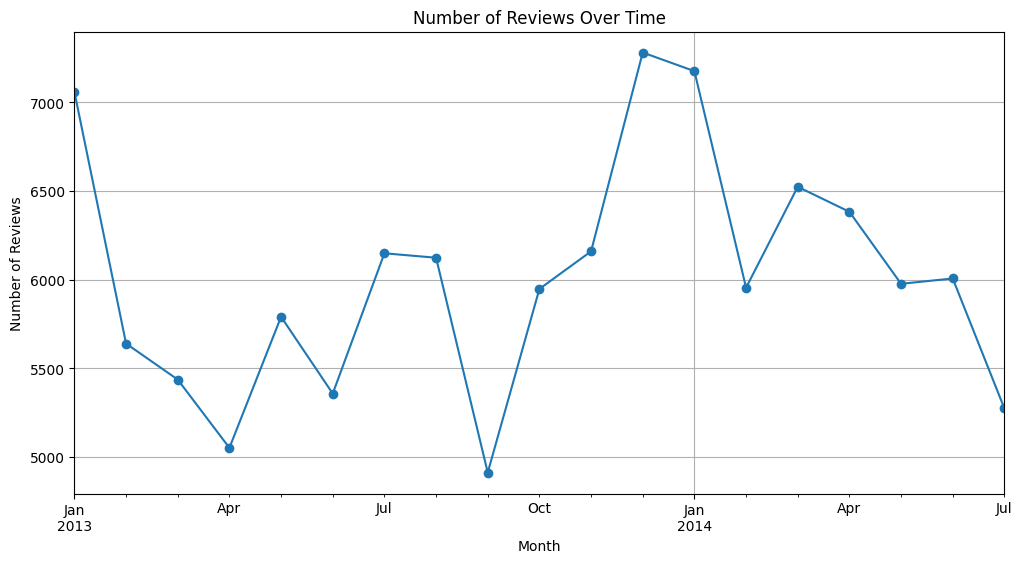

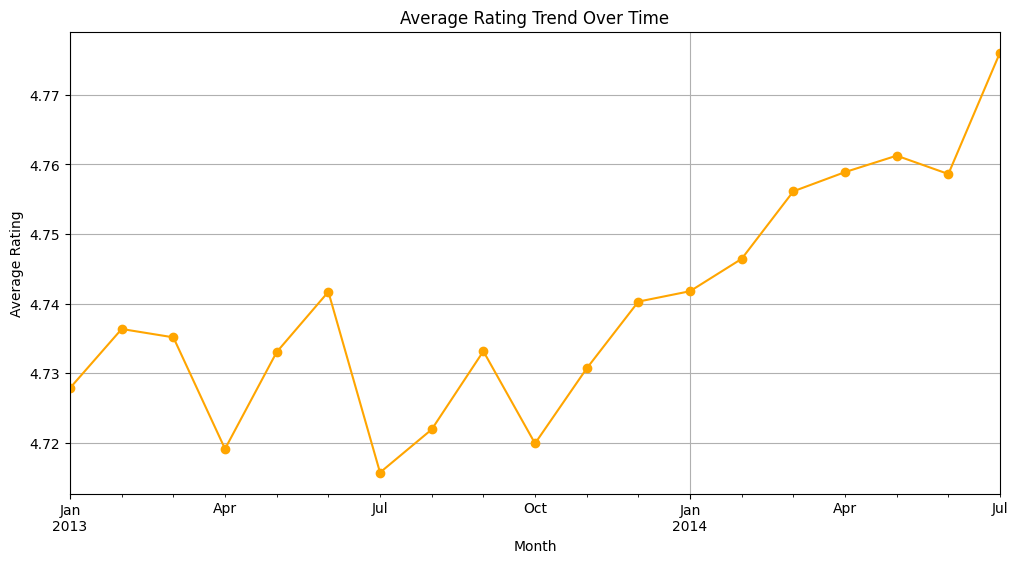

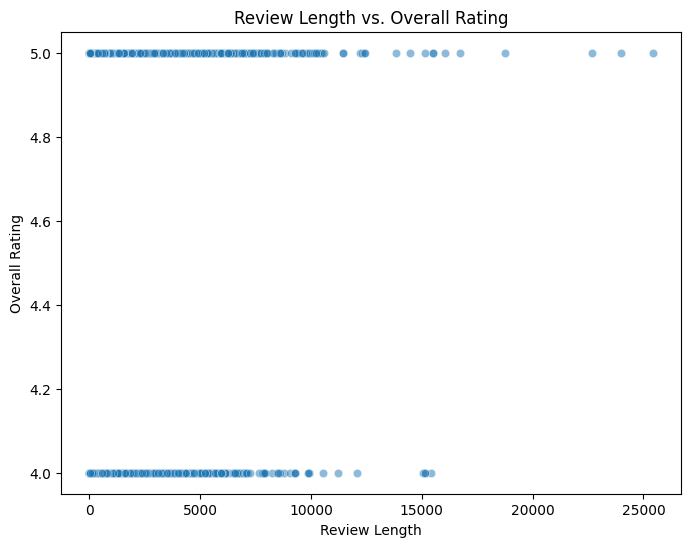


Correlation Matrix:
                overall  review_length
overall        1.000000      -0.066712
review_length -0.066712       1.000000


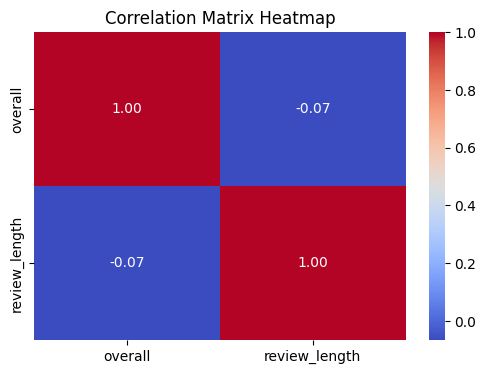

<ipython-input-9-0892a4ec9871>:132: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = df.resample('M').size()


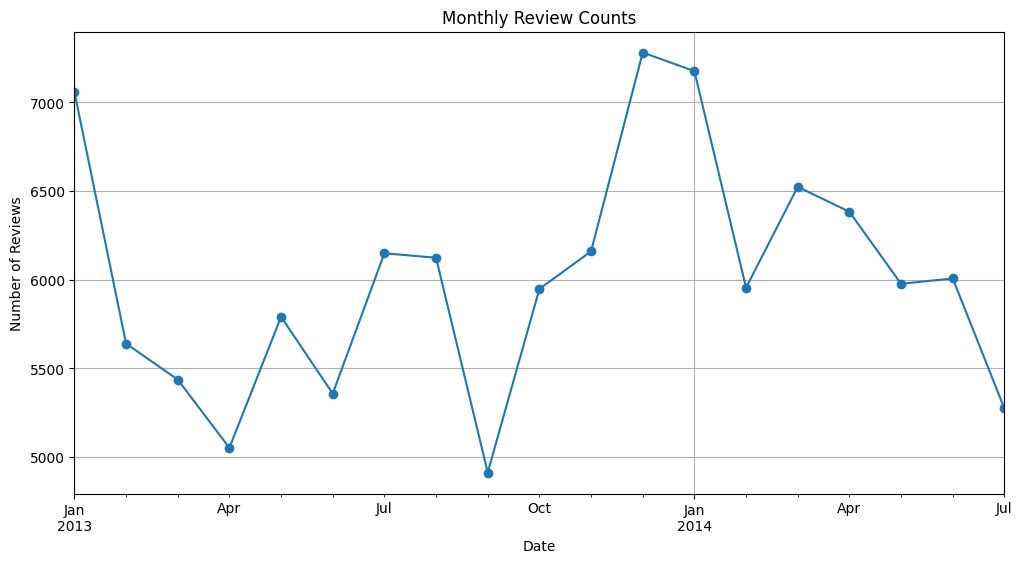

<ipython-input-9-0892a4ec9871>:145: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  metrics = df.resample('M').agg({



Metrics DataFrame (Monthly Aggregation):
            total_reviews  average_rating
reviewTime                               
2013-01-31           7059        4.727865
2013-02-28           5640        4.736348
2013-03-31           5437        4.735148
2013-04-30           5052        4.719121
2013-05-31           5791        4.733034


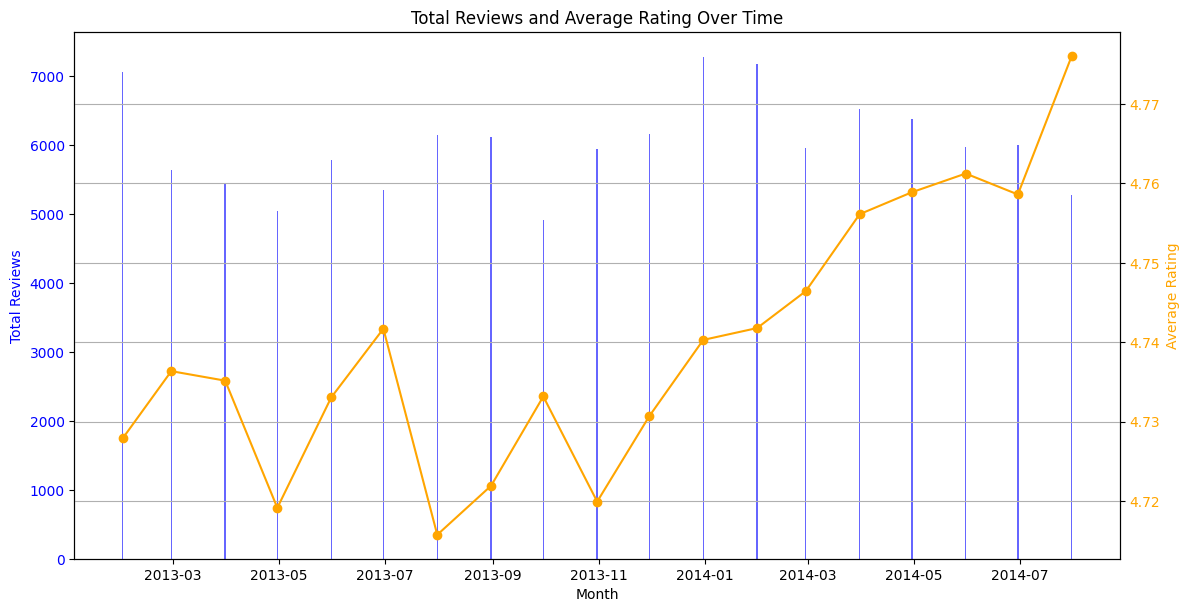

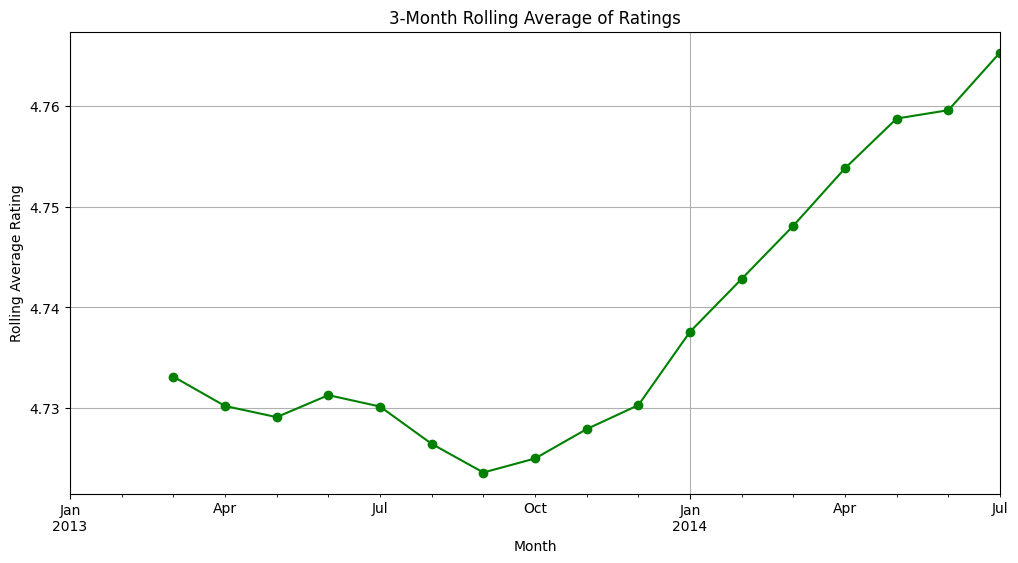

<ipython-input-9-0892a4ec9871>:198: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sentiment = df.resample('M')['sentiment_score'].mean()


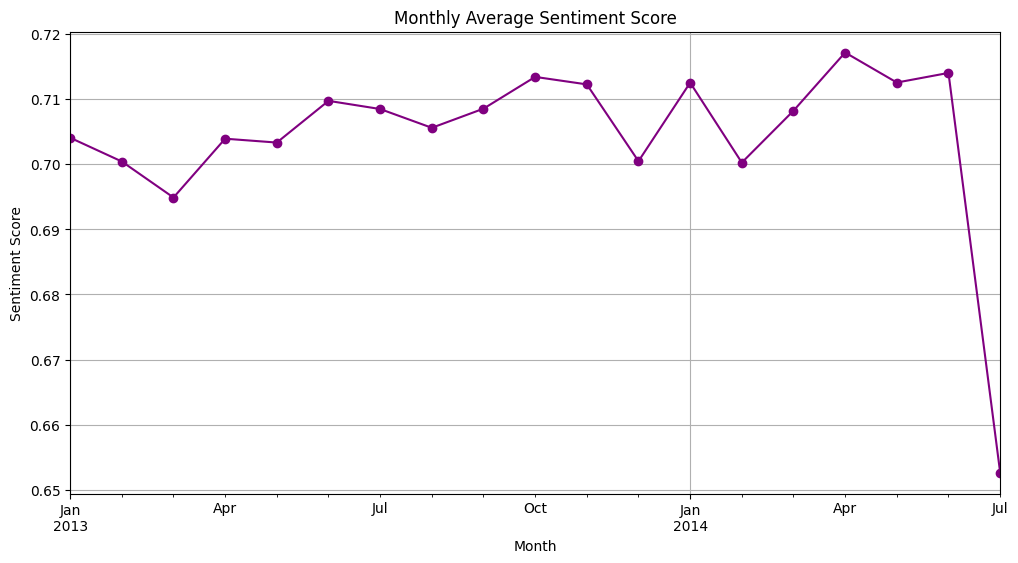


ADF Test Results:
ADF Statistic: -2.0712417508092775
p-value: 0.2562345276207917
The time series is not stationary. Differencing may be required.


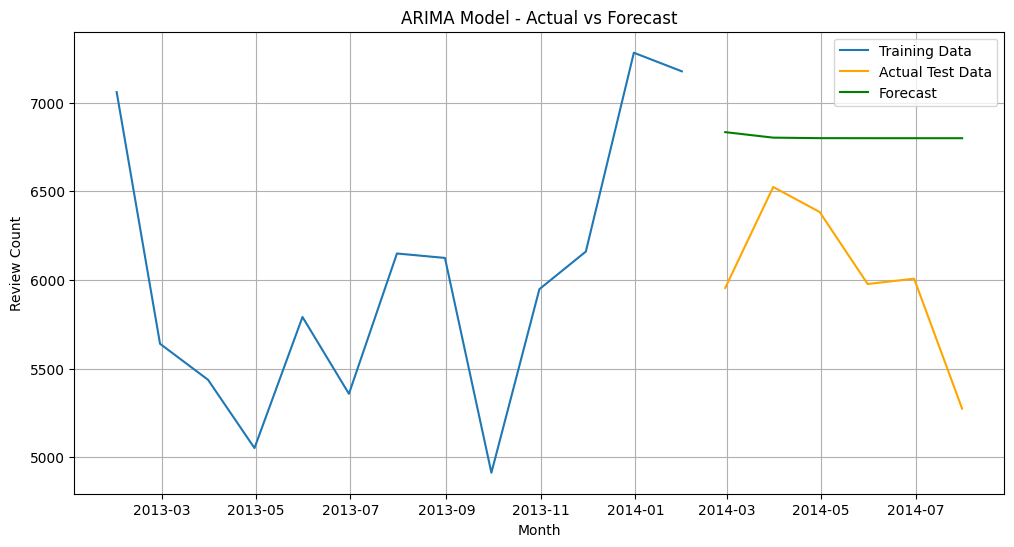

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 9.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi3rwuays/3igq_5fn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpi3rwuays/2m_1omba.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61929', 'data', 'file=/tmp/tmpi3rwuays/3igq_5fn.json', 'init=/tmp/tmpi3rwuays/2m_1omba.json', 'output', 'file=/tmp/tmpi3rwuays/prophet_modelq9aigg9a/prophet_model-20241123063907.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:39:07 - cmdstanpy - INFO - Chain [1] start processing
IN

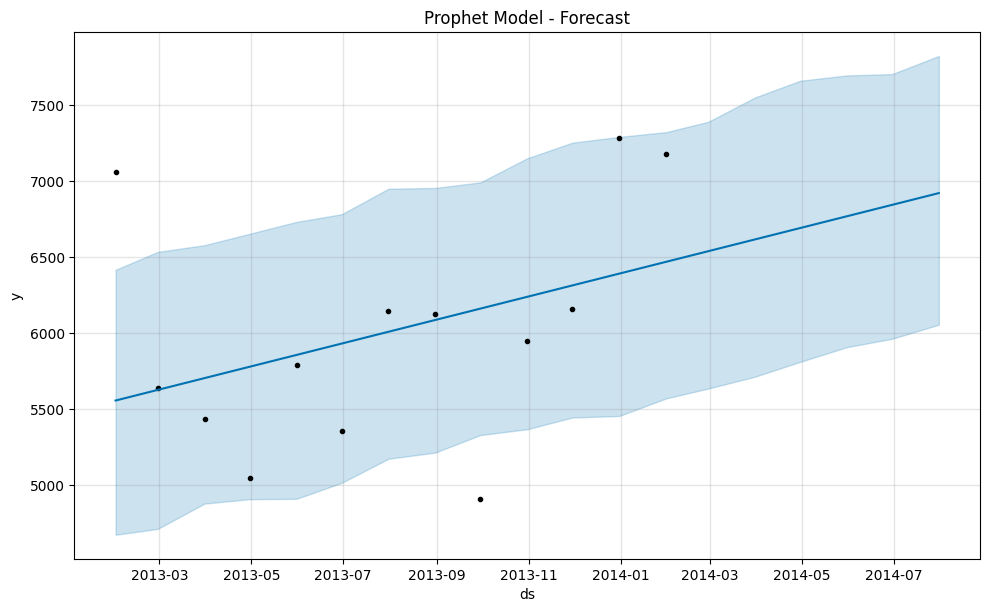


ARIMA Model Evaluation:
Mean Absolute Error (MAE): 785.3614482439647
Root Mean Squared Error (RMSE): 880.4695446826499

Prophet Model Evaluation:
Mean Absolute Error (MAE): 709.836602283367
Root Mean Squared Error (RMSE): 864.3246516811109


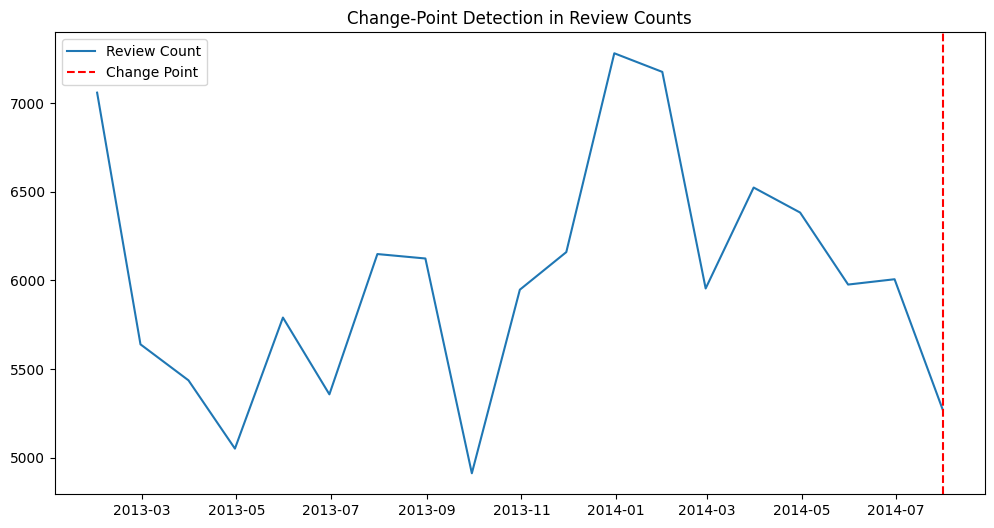

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
from prophet import Prophet
%matplotlib inline

# Load the JSON file
# Update the path to match the location of your file in Google Drive
file_path = "/content/drive/My Drive/Cell_Phones_and_Accessories_5.json"

# Read the JSON file into a DataFrame
df = pd.read_json(file_path, lines=True)

# Preview the DataFrame
print("Initial DataFrame Preview:")
print(df.head())
print("\nInitial DataFrame Info:")
print(df.info())

# Extract Date Information
# Convert 'reviewTime' to datetime format
df['reviewTime'] = pd.to_datetime(df['reviewTime'])

# Filter reviews by a date range (e.g., after 2013-01-01)
start_date = '2013-01-01'
df = df[df['reviewTime'] >= start_date]

# Handle Missing Data
# Check for missing or null values in key fields
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Drop rows with missing values in critical columns
# Critical columns: 'reviewTime', 'overall', 'reviewText'
df = df.dropna(subset=['reviewTime', 'overall', 'reviewText'])

# Check if any missing values remain
print("\nMissing values after handling:")
print(df.isnull().sum())

# Standardize Ratings
# Ensure all ratings ('overall') are numeric
# This should already be numeric for the given dataset, but we ensure it here:
df['overall'] = pd.to_numeric(df['overall'], errors='coerce')

# Filter Relevant Data
# Example: Filtering by rating or specific products
# Filter reviews for products with 'overall' rating >= 4
df = df[df['overall'] >= 4]

# Sort Dataset by Date
# Sort the dataset by 'reviewTime' for time series analysis
df = df.sort_values(by='reviewTime')

# Reset index after sorting
df = df.reset_index(drop=True)

# Save Filtered Data
# Save filtered data for further analysis
df.to_csv('/content/drive/My Drive/filtered_reviews.csv', index=False)

# Final DataFrame Preview
print("\nCleaned and Filtered DataFrame Preview:")
print(df.head())
print(f"\nFinal Dataset size: {df.shape[0]}")

# Visualize Review Counts Over Time
# Group data by month and count the number of reviews
df['month'] = df['reviewTime'].dt.to_period('M')  # Convert dates to monthly periods
review_counts = df.groupby('month').size()

# Plot the number of reviews over time
plt.figure(figsize=(12, 6))
review_counts.plot(kind='line', marker='o')
plt.title("Number of Reviews Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

# Analyze Rating Trends
# Calculate the average rating per month
avg_ratings = df.groupby('month')['overall'].mean()

# Plot the average rating trend
plt.figure(figsize=(12, 6))
avg_ratings.plot(kind='line', color='orange', marker='o')
plt.title("Average Rating Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()

# Investigate Correlations
# Add a column for review length (number of characters in 'reviewText')
df['review_length'] = df['reviewText'].apply(len)

# Create scatter plot: review length vs. overall rating
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='review_length', y='overall', alpha=0.5)
plt.title("Review Length vs. Overall Rating")
plt.xlabel("Review Length")
plt.ylabel("Overall Rating")
plt.show()

# Check correlation matrix for numerical features
correlation_matrix = df[['overall', 'review_length']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap for correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

# Time Aggregation
# Set 'reviewTime' as the index for resampling
df.set_index('reviewTime', inplace=True)

# Resample data into daily, weekly, and monthly intervals
daily_reviews = df.resample('D').size()
weekly_reviews = df.resample('W').size()
monthly_reviews = df.resample('M').size()

# Plot aggregated review counts
plt.figure(figsize=(12, 6))
monthly_reviews.plot(kind='line', marker='o')
plt.title("Monthly Review Counts")
plt.xlabel("Date")
plt.ylabel("Number of Reviews")
plt.grid(True)
plt.show()

# Calculate Metrics
# Calculate the total number of reviews and average rating per month
metrics = df.resample('M').agg({
    'overall': ['count', 'mean']  # Count of reviews and average rating
})

metrics.columns = ['total_reviews', 'average_rating']  # Rename columns
print("\nMetrics DataFrame (Monthly Aggregation):")
print(metrics.head())

# Plot total reviews and average rating over time
fig, ax1 = plt.subplots(figsize=(12, 6))

# Total reviews (bar chart)
ax1.bar(metrics.index, metrics['total_reviews'], color='blue', alpha=0.6, label='Total Reviews')
ax1.set_xlabel("Month")
ax1.set_ylabel("Total Reviews", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Average rating (line plot)
ax2 = ax1.twinx()
ax2.plot(metrics.index, metrics['average_rating'], color='orange', marker='o', label='Average Rating')
ax2.set_ylabel("Average Rating", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

fig.tight_layout()
plt.title("Total Reviews and Average Rating Over Time")
plt.grid(True)
plt.show()

# Calculate moving averages for smoothing trends
metrics['rolling_avg_rating'] = metrics['average_rating'].rolling(window=3).mean()  # 3-month rolling average

# Plot rolling average
plt.figure(figsize=(12, 6))
metrics['rolling_avg_rating'].plot(kind='line', color='green', marker='o')
plt.title("3-Month Rolling Average of Ratings")
plt.xlabel("Month")
plt.ylabel("Rolling Average Rating")
plt.grid(True)
plt.show()

# Sentiment Analysis (Optional)
# Install VADER for sentiment analysis if not installed
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Generate sentiment scores for each review
df['sentiment_score'] = df['reviewText'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Average sentiment score per month
monthly_sentiment = df.resample('M')['sentiment_score'].mean()

# Plot sentiment score trend
plt.figure(figsize=(12, 6))
monthly_sentiment.plot(kind='line', color='purple', marker='o')
plt.title("Monthly Average Sentiment Score")
plt.xlabel("Month")
plt.ylabel("Sentiment Score")
plt.grid(True)
plt.show()

# Prepare Data for Modeling
# Focus on monthly review counts for modeling
time_series_data = monthly_reviews.to_frame(name='review_count')

# Split into training and test sets (e.g., last 6 months for testing)
train_data = time_series_data[:-6]
test_data = time_series_data[-6:]

# Check for stationarity using Augmented Dickey-Fuller (ADF) test
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(train_data['review_count'])
print("\nADF Test Results:")
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")
if adf_test[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing may be required.")

# Differencing if required
if adf_test[1] > 0.05:
    time_series_data['diff'] = time_series_data['review_count'].diff().dropna()

# Apply ARIMA/SARIMA Model
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (adjust p, d, q parameters as needed)
model = ARIMA(train_data['review_count'], order=(1, 1, 1))
arima_result = model.fit()

# Forecast future values
forecast = arima_result.forecast(steps=len(test_data))

# Plot ARIMA results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Actual Test Data', color='orange')
plt.plot(test_data.index, forecast, label='Forecast', color='green')
plt.legend()
plt.title("ARIMA Model - Actual vs Forecast")
plt.xlabel("Month")
plt.ylabel("Review Count")
plt.grid(True)
plt.show()

# Apply Prophet Model
from prophet import Prophet

# Prepare data for Prophet
prophet_data = time_series_data.reset_index() # Reset index to get 'reviewTime' back as a column
prophet_data = prophet_data[['reviewTime', 'review_count']]
prophet_data.columns = ['ds', 'y']  # Prophet requires columns 'ds' (datetime) and 'y' (value)

# Initialize and fit Prophet model
prophet_model = Prophet()
prophet_model.fit(prophet_data[:-6])

# Make future dataframe and predict
future = prophet_model.make_future_dataframe(periods=6, freq='M')
forecast_prophet = prophet_model.predict(future)

# Plot Prophet results
prophet_model.plot(forecast_prophet)
plt.title("Prophet Model - Forecast")
plt.show()

# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate ARIMA predictions
mae_arima = mean_absolute_error(test_data, forecast)
rmse_arima = np.sqrt(mean_squared_error(test_data, forecast))

print("\nARIMA Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_arima}")
print(f"Root Mean Squared Error (RMSE): {rmse_arima}")

# Evaluate Prophet predictions
forecast_test = forecast_prophet[-6:]['yhat'].values  # Predicted values for test range
mae_prophet = mean_absolute_error(test_data['review_count'], forecast_test)
rmse_prophet = np.sqrt(mean_squared_error(test_data['review_count'], forecast_test))

print("\nProphet Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_prophet}")
print(f"Root Mean Squared Error (RMSE): {rmse_prophet}")

# Detect Anomalies using Change-Point Detection
!pip install ruptures

import ruptures as rpt

# Apply change-point detection on the review count
algo = rpt.Pelt(model="rbf").fit(time_series_data['review_count'].values)  # Use .values to get NumPy array
change_points = algo.predict(pen=10)

# Visualize detected change-points
plt.figure(figsize=(12, 6))
plt.plot(time_series_data['review_count'], label='Review Count')
for cp in change_points:
    plt.axvline(x=time_series_data.index[cp-1], color='red', linestyle='--', label='Change Point')
plt.legend()
plt.title("Change-Point Detection in Review Counts")
plt.show()
